## 1. Business Understanding
### 1.1 Business Overview
In the modern technology era, social media platforms such as Twoter(x) have become powerful soaces where users share real-time opinions on brands and products. Companies such as Apple and Google, both global leaders  in technology and innovation, benefit greatly from understanding these public sentiments. Analyzing tweets about them helps reveal consumer opinions, trends and brand perceptions. Since manually reviewing  thousands of tweets is inefficient, automated sentiment analysis provides an effective solution. Classifing tweets as positive,negative or neutral to help companies monitor reputation, improve customer satisfaction  and make informed strategic decisions

### 1.2 Problem Statement
In odays digital era, social media platforms like Twitter(x) have becomes key spaces where people share their opinions about brands and products. For global technology companies like Apple and Google, these tweets offer valuable insights into customer satisfaction, brand reputation and customer loyalty. However, the large volume of unstructured data makes it difficult to manually analyze the oublics sentiment in real time. To solve this problem, this project aims at developing an automated sentiment analysis model using Natural Language Processing(NLP) to classify tweets as positive, negative or neutral. This will help the companies better understand consumer perception, respond to feedback quickly and generally improve their products and overall Brand Image
### 1.3 Business Objectives 
 ### Main Objective
To build a model that can rate the sentiment of a Tweet based on its content
 ### Specific Objectives
To establish patterns and relationships between tweet content and corresponding sentiment categories.

To identify whether the special characters portray meaningful info. characters #,@ and lin
kCompare model results using metrics such as accuracy, precision, recall and F-1 score to identify the best-performing model.

Analyze a lot of tweets to find out what emotional patterns are popular and whether people's perceptions of Apple and Google products are changing.

Recognize the Main Sentiment Drivers: To determine which words, phrases, or subjects have the greatest influence on whether people see a brand favoly or unfavorably

### Research Questions
1. What patterns and relationships exist between content and their correspondiing sentiment categories?
2. Do special characters suc as #,@ and links carry any meaningful information that affects tweet sentiment:?
3. What specific products, features or topics are the main targets of users' emotions towards  Apple and Google?
4. Which machine learning model performs the best in classfying tweet sentiment based on metrics such as accuracy, precision, recall and F1-score?
5. SWhat are the main words, phrases or themes that drive positove ir negative sentiment towards these brands , and how do these patterns change over time?

### 1.4. Success Criteria
The project will be successful if it develops an accurate and reliable sentiment classification model that achieves an average F1-score of above 0.80 and maintains balanced precision and recall across all sentiment categories.
Success will also be measured by the models ability to generaliz well to unseen data, minimize misclassification between positive and negative tweets and provide actionable insights that help improve customer service and management of the brand.rab



## 2.0 Data Understanding
### 2.1 Data source and Description
- **Source:** This dataset is from CrowdFlower via data.world containing human raters sentiments. For more insights about the dataset you can follow this link https://data.world/crowdflower/brands-and-product-emotions.

- **Description** The dataset has sentiments from over 9000 twitter users with each row containing a  users tweet_text, emotion_in_tweet_is_directed_at and emotion. Our main target is to use the text and train our model to predict the emotion from the text.


### 2.2 Data Loading
1. Import necessary libraries
2. Load Dataset

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading Dataset 
df = pd.read_csv('apple-twitter.csv', encoding='ISO-8859-1')

### 2.3 Data Exploration


In [3]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
df.shape

(9093, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Text(0.5, 1.0, 'Emotion Proportions')

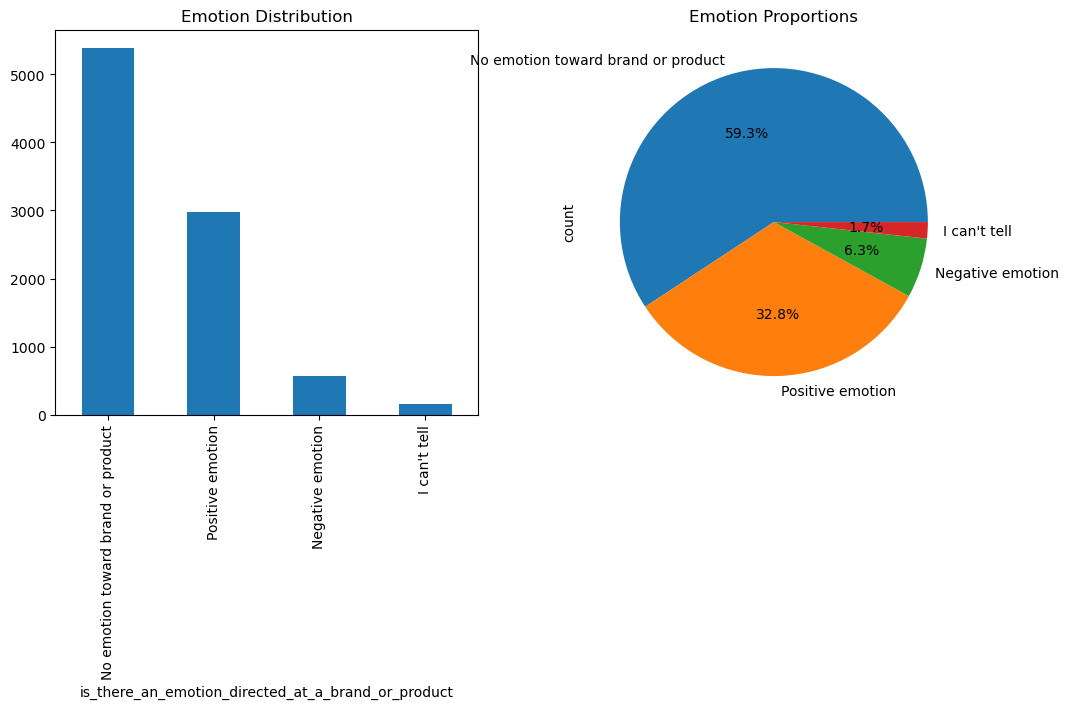

In [6]:
# Distribution of emotions in the dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar')
plt.title('Emotion Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Emotion Proportions')

Missing data on where emotion is directed to: 5802/9093 (63.8%)


Text(0.5, 0, 'Count')

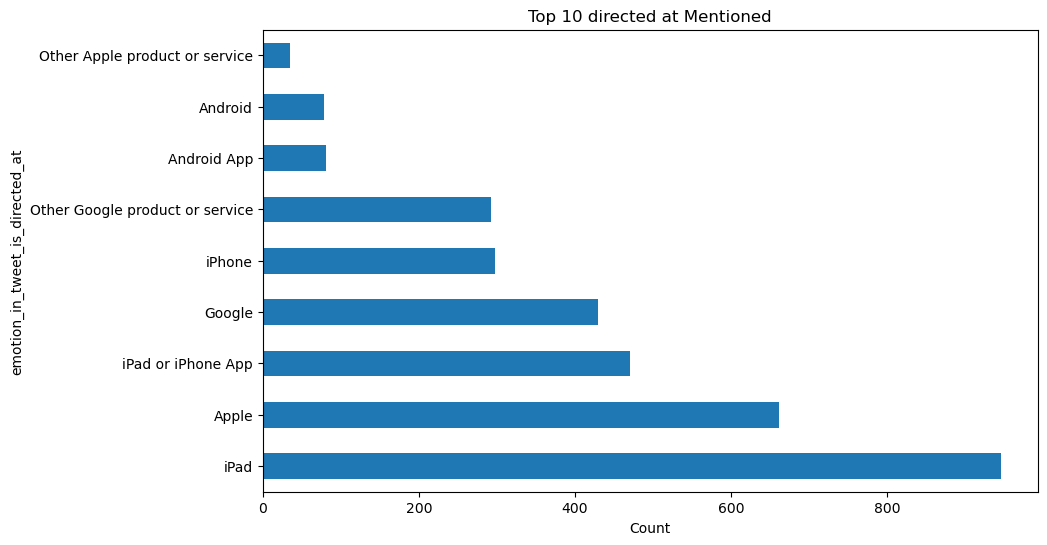

In [7]:
# Missingness analysis
missing_brand = df['emotion_in_tweet_is_directed_at'].isna().sum()
total_length = len(df)
print(f"Missing data on where emotion is directed to: {missing_brand}/{total_length} ({missing_brand/total_length:.1%})")

# Plot for the non-missing values
directed_at_counts = df['emotion_in_tweet_is_directed_at'].value_counts().head(10)
plt.figure(figsize=(10, 6))
directed_at_counts.plot(kind='barh')
plt.title('Top 10 directed at Mentioned')
plt.xlabel('Count')

In [8]:
# checking for miaaing values 
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

We have missing values in tweet-text and emotion_in_tweet columns.

In [9]:
# checking for duplicates
df.duplicated().sum()

22

In [10]:
# drop duplicates 
df.drop_duplicates(inplace=True)

In [11]:
df['tweet_text'].duplicated().sum()

5

In [12]:
df.drop_duplicates(subset=['tweet_text'],inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].isna().sum()

0

In [15]:
df['emotion_in_tweet_is_directed_at'].isna().sum()

5786

In [16]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               943
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: count, dtype: int64

In [17]:
df['emotion_in_tweet_is_directed_at'].fillna('unknown',inplace=True)


/tmp/ipykernel_5872/1780644666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emotion_in_tweet_is_directed_at'].fillna('unknown',inplace=True)


In [18]:
df['emotion_in_tweet_is_directed_at'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [19]:
df['tweet_text'].isna().sum()

1

In [20]:
df.dropna(subset='tweet_text',inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9065 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9065 non-null   object
 1   emotion_in_tweet_is_directed_at                     9065 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9065 non-null   object
dtypes: object(3)
memory usage: 283.3+ KB


In [22]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5372
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [23]:
# Calculating character count
df['char_count'] = df['tweet_text'].str.len()

# Calculating word count
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))
print(df[['tweet_text', 'char_count', 'word_count']])

                                             tweet_text  char_count  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...         127   
1     @jessedee Know about @fludapp ? Awesome iPad/i...         139   
2     @swonderlin Can not wait for #iPad 2 also. The...          79   
3     @sxsw I hope this year's festival isn't as cra...          82   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...         131   
...                                                 ...         ...   
9088                      Ipad everywhere. #SXSW {link}          29   
9089  Wave, buzz... RT @mention We interrupt your re...         125   
9090  Google's Zeiger, a physician never reported po...         145   
9091  Some Verizon iPhone customers complained their...         140   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...         104   

      word_count  
0             23  
1             22  
2             15  
3             15  
4             17  
...          ...  
9088          

In [28]:
data = df

In [25]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Define the text cleaning function 
def clean_text_with_stemming(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove URLs, mentions, and hashtags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)

    # 3. Tokenize using RegexpTokenizer (removes punctuation)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # 5. Apply Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return ' '.join(stemmed_tokens)

# Apply the new cleaning function to the 'tweet_text' column
df['cleaned_text'] = df['tweet_text'].apply(clean_text_with_stemming)

[nltk_data] Downloading package stopwords to /home/r0s1ta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#conda install -c conda-forge wordcloud


Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


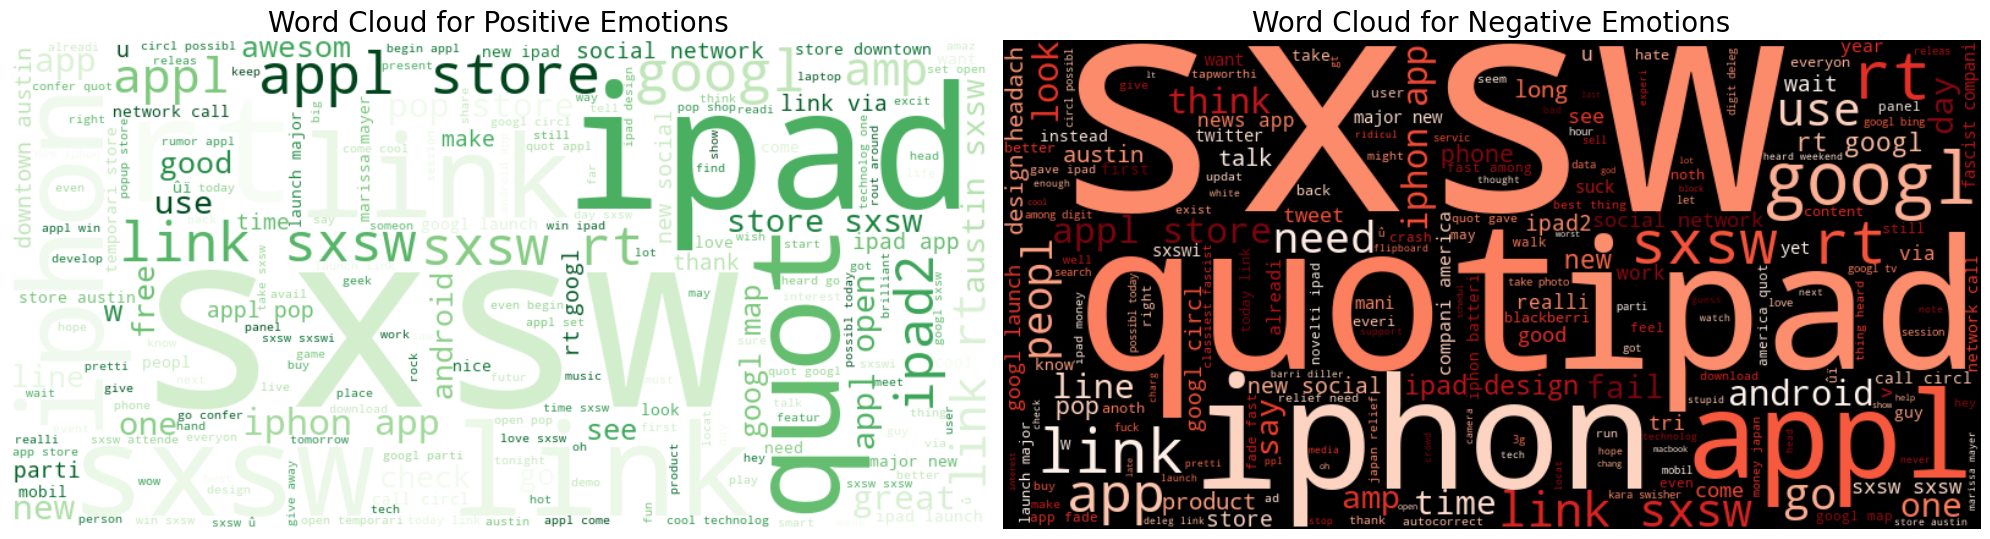

In [29]:
# To identify if frequency of cetrain word is assiciated with positive or negative sentiments.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# for better comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Word Cloud for Positive Emotions
# Concatenate all cleaned positive tweets into a single string
positive_tweets = ' '.join(data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']['cleaned_text'])

# Create a WordCloud object
wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens'
).generate(positive_tweets)

# Display the word cloud in the first subplot
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud for Positive Emotions', fontsize=20)

# Word Cloud for Negative Emotions
# Concatenate all cleaned negative tweets into a single string
negative_tweets = ' '.join(data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']['cleaned_text'])

# Create a WordCloud object
wordcloud_negative = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Reds' 
).generate(negative_tweets)

# Display the word cloud in the second subplot
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud for Negative Emotions', fontsize=20)
plt.tight_layout()
plt.show()


In [30]:
# Inspecting words that appear together for modeling later
from collections import defaultdict, Counter
from nltk.util import ngrams
import pandas as pd

def get_ngrams_by_sentiment(df, text_column, sentiment_column, n):
    sentiment_ngrams = defaultdict(list)
    for index, row in df.iterrows():
        sentiment = row[sentiment_column]
        text = row[text_column]
        
        if isinstance(text, str) and text.strip():
            words = text.split()
            if len(words) >= n:
                sentiment_ngrams[sentiment].extend(list(ngrams(words, n)))
    
    most_common_ngrams = {
        sentiment: Counter(ngrams_list).most_common(10)
        for sentiment, ngrams_list in sentiment_ngrams.items()
    }
    
    return most_common_ngrams


# Get unique sentiment categories
sentiments = data['is_there_an_emotion_directed_at_a_brand_or_product'].unique()
for sentiment in sentiments:
    print(f"\n Top Bigrams (2-grams) for sentiment: '{sentiment}'")
    
    # Getting bigrams for this sentiment
    bigram_results = get_ngrams_by_sentiment(
        data, 
        'cleaned_text', 
        'is_there_an_emotion_directed_at_a_brand_or_product', 
        n=2
    )
    
    # Print bigrams for this specific sentiment
    if sentiment in bigram_results:
        for bigram, count in bigram_results[sentiment]:
            print(f"'{' '.join(bigram)}': {count}")
    
    print(f"\n Top Trigrams (3-grams) for sentiment: '{sentiment}' ")
    
    # Get trigrams for this sentiment
    trigram_results = get_ngrams_by_sentiment(
        data, 
        'cleaned_text', 
        'is_there_an_emotion_directed_at_a_brand_or_product', 
        n=3
    )
    
    # Print trigrams for this specific sentiment
    if sentiment in trigram_results:
        for trigram, count in trigram_results[sentiment]:
            print(f"'{' '.join(trigram)}': {count}")


 Top Bigrams (2-grams) for sentiment: 'Negative emotion'
'ipad 2': 57
'appl store': 25
'sxsw link': 25
'iphon app': 24
'link sxsw': 24
'ipad design': 20
'rt googl': 19
'design headach': 17
'googl circl': 16
'new social': 16

 Top Trigrams (3-grams) for sentiment: 'Negative emotion' 
'ipad design headach': 16
'new social network': 13
'ipad news app': 12
'major new social': 12
'social network call': 11
'network call circl': 11
'fascist compani america': 11
'launch major new': 10
'googl launch major': 9
'novelti ipad news': 9

 Top Bigrams (2-grams) for sentiment: 'Positive emotion'
'ipad 2': 420
'sxsw link': 303
'appl store': 223
'link sxsw': 173
'iphon app': 155
'pop store': 134
'store sxsw': 122
'appl open': 112
'sxsw appl': 108
'austin sxsw': 101

 Top Trigrams (3-grams) for sentiment: 'Positive emotion' 
'new social network': 74
'store downtown austin': 65
'appl pop store': 62
'social network call': 57
'network call circl': 57
'ipad 2 launch': 54
'launch major new': 54
'major new so

In [31]:
# Does special characters @.# and link potry meaningful information?
from collections import Counter
# 1. User Mentions (@) Analysis
def extract_mentions(text):
    #Extract all @mentions from text
    if isinstance(text, str):
        return re.findall(r'@\w+', text.lower())
    return []

# Extracting all  the mentions
all_mentions = []
for text in data['tweet_text']:
    all_mentions.extend(extract_mentions(text))

# Count most common mentions
mention_counter = Counter(all_mentions)
top_mentions = mention_counter.most_common(10)

print("Top 10 most mentioned user/brands")
print("=" * 60)
for mention, count in top_mentions:
    print(f"{mention}: {count} times")

# Mentions by sentiment
print("Top mention by sentiment")
print("=" * 60)
sentiments = data['is_there_an_emotion_directed_at_a_brand_or_product'].unique()
for sentiment in sentiments:
    sentiment_data = data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == sentiment]
    sentiment_mentions = []
    for text in sentiment_data['tweet_text']:
        sentiment_mentions.extend(extract_mentions(text))
    
    if sentiment_mentions:
        top_sentiment_mentions = Counter(sentiment_mentions).most_common(10)
        print(f"\n--- Sentiment: '{sentiment}' ---")
        for mention, count in top_sentiment_mentions:
            print(f"  {mention}: {count}")

Top 10 most mentioned user/brands
@mention: 7092 times
@madebymany: 5 times
@garyvee: 3 times
@schmittastic: 3 times
@gowalla: 2 times
@jerranalley: 2 times
@tbalinas: 2 times
@mentionc: 2 times
@mentione: 2 times
@mentionr: 2 times
Top mention by sentiment

--- Sentiment: 'Negative emotion' ---
  @mention: 313
  @wesley83: 1
  @sxsw: 1

--- Sentiment: 'Positive emotion' ---
  @mention: 2185
  @madebymany: 5
  @gowalla: 2
  @garyvee: 2
  @mentionr: 2
  @jessedee: 1
  @fludapp: 1
  @swonderlin: 1
  @sxtxstate: 1
  @thenextweb: 1

--- Sentiment: 'No emotion toward brand or product' ---
  @mention: 4490
  @schmittastic: 3
  @mentionc: 2
  @mentione: 2
  @iampaintedface: 2
  @h0u5t0n: 2
  @aclu: 2
  @aarpbulletin: 2
  @mentionw: 2
  @teachntech00: 1

--- Sentiment: 'I can't tell' ---
  @mention: 104
  @iangogame: 1


In [32]:
# 2. Hashtags (#) Analysis
def extract_hashtags(text):
    #Extract all #hashtags from text
    if isinstance(text, str):
        return re.findall(r'#\w+', text.lower())
    return []

# Extracting  all hashtags
all_hashtags = []
for text in data['tweet_text']:
    all_hashtags.extend(extract_hashtags(text))

# Count most common hashtags
hashtag_counter = Counter(all_hashtags)
top_hashtags = hashtag_counter.most_common(10)

print("Top 10 most popular hashtags")
print("=" * 60)
for hashtag, count in top_hashtags:
    print(f"{hashtag}: {count} times")

# Hashtags by sentiment
print("Top Hashtags by Sentiments")
print("=" * 60)
for sentiment in sentiments:
    sentiment_data = data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == sentiment]
    sentiment_hashtags = []
    for text in sentiment_data['tweet_text']:
        sentiment_hashtags.extend(extract_hashtags(text))
    
    if sentiment_hashtags:
        top_sentiment_hashtags = Counter(sentiment_hashtags).most_common(10)
        print(f"\n Sentiment: '{sentiment}' ")
        for hashtag, count in top_sentiment_hashtags:
            print(f"  {hashtag}: {count}")


Top 10 most popular hashtags
#sxsw: 9093 times
#apple: 416 times
#google: 322 times
#sxswi: 316 times
#ipad2: 296 times
#iphone: 266 times
#ipad: 264 times
#android: 131 times
#austin: 112 times
#circles: 98 times
Top Hashtags by Sentiments

 Sentiment: 'Negative emotion' 
  #sxsw: 569
  #ipad: 19
  #apple: 15
  #google: 13
  #iphone: 12
  #tapworthy: 12
  #sxswi: 11
  #fail: 11
  #japan: 9
  #circles: 8

 Sentiment: 'Positive emotion' 
  #sxsw: 2988
  #apple: 177
  #ipad2: 130
  #sxswi: 96
  #ipad: 93
  #iphone: 82
  #google: 69
  #android: 42
  #austin: 40
  #tech: 28

 Sentiment: 'No emotion toward brand or product' 
  #sxsw: 5379
  #google: 237
  #apple: 221
  #sxswi: 206
  #iphone: 169
  #ipad2: 156
  #ipad: 148
  #android: 84
  #circles: 72
  #austin: 69

 Sentiment: 'I can't tell' 
  #sxsw: 157
  #ipad: 4
  #sxswi: 3
  #iphone: 3
  #apple: 3
  #google: 3
  #uxdes: 2
  #austin: 2
  #japan: 2
  #ipad2: 2


In [33]:
# 3. Links (http/https) Analysis
def contains_link(text):
    #Check if text contains a URL
    if isinstance(text, str):
        return bool(re.search(r'http[s]?://\S+', text))
    return False

# Count tweets with links
data['contains_link'] = data['tweet_text'].apply(contains_link)
total_with_links = data['contains_link'].sum()
total_tweets = len(data)
percentage_with_links = (total_with_links / total_tweets) * 100

print("Link Analysis")
print("=" * 60)
print(f"Total tweets: {total_tweets}")
print(f"Tweets with links: {total_with_links}")
print(f"Percentage with links: {percentage_with_links:.2f}%")

# Links by sentiment
print("\n Links by Sentiment ")
for sentiment in sentiments:
    sentiment_data = data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == sentiment]
    links_count = sentiment_data['contains_link'].sum()
    sentiment_total = len(sentiment_data)
    percentage = (links_count / sentiment_total * 100) if sentiment_total > 0 else 0
    print(f"{sentiment}: {links_count}/{sentiment_total} ({percentage:.2f}%)")


Link Analysis
Total tweets: 9065
Tweets with links: 25
Percentage with links: 0.28%

 Links by Sentiment 
Negative emotion: 0/569 (0.00%)
Positive emotion: 14/2968 (0.47%)
No emotion toward brand or product: 11/5372 (0.20%)
I can't tell: 0/156 (0.00%)


In [34]:
# Example tweet by emotion class
print("Example Tweet by Emotion Class")
print("=" * 60)

emotions = data['emotion_in_tweet_is_directed_at'].unique()
for emotion in emotions:
    emotion_data = data[data['emotion_in_tweet_is_directed_at'] == emotion]
    n_samples = min(3, len(emotion_data))  # Show up to 3 examples
    
    print(f"EMOTION: '{emotion}' (Total: {len(emotion_data)} tweets)")
    print(f"{'_'*60}")
    
    if n_samples > 0:
        sample_tweets = emotion_data.sample(n=n_samples, random_state=42)
        for idx, (_, row) in enumerate(sample_tweets.iterrows(), 1):
            print(f"\nExample {idx}:")
            print(f"  Tweet: {row['tweet_text']}")
            print(f"  Sentiment: {row['is_there_an_emotion_directed_at_a_brand_or_product']}")
            print(f"  Emotion Target: {row['emotion_in_tweet_is_directed_at']}")


Example Tweet by Emotion Class
EMOTION: 'iPhone' (Total: 296 tweets)
____________________________________________________________

Example 1:
  Tweet: So, #twitter for iPhone: anyway to remove/burn hashtags? Eg #sxsw? V v bored already, already
  Sentiment: Negative emotion
  Emotion Target: iPhone

Example 2:
  Tweet: Fuck the iphone! RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW ... {link}
  Sentiment: Negative emotion
  Emotion Target: iPhone

Example 3:
  Tweet: I'll use an iPad 2 if someone gives it to me. Otherwise, iPhone is actually more than up to task #sxsw
  Sentiment: Positive emotion
  Emotion Target: iPhone
EMOTION: 'iPad or iPhone App' (Total: 469 tweets)
____________________________________________________________

Example 1:
  Tweet: Hey #sxsw peeps! Our new IPhone app ON #Voicefeed just launched the US: {link} Check it out and let us know what you think!
  Sentiment: Positive emotion
  Emotion Target: iPad or iPhone App

Exam

In [35]:
# Categorical Analysis (emotion_in_tweet_is_directed_at)
print("Categorical Aanlysis: emotion_in_tweet_is_directed_at")
print("_" * 60)

# Value counts
emotion_counts = data['emotion_in_tweet_is_directed_at'].value_counts()
print("\nDistribution of Emotion Targets:")
print(emotion_counts)
print(f"\nPercentage Distribution:")
print(emotion_counts / len(data) * 100)

# Cross-tabulation with sentiment
print("CROSS-TABULATION: Emotion Target vs Sentiment")
print("_" * 60)
crosstab = pd.crosstab(
    data['emotion_in_tweet_is_directed_at'], 
    data['is_there_an_emotion_directed_at_a_brand_or_product'],
    margins=True
)
print(crosstab)


Categorical Aanlysis: emotion_in_tweet_is_directed_at
____________________________________________________________

Distribution of Emotion Targets:
emotion_in_tweet_is_directed_at
unknown                            5785
iPad                                943
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

Percentage Distribution:
emotion_in_tweet_is_directed_at
unknown                            63.816878
iPad                               10.402648
Apple                               7.269719
iPad or iPhone App                  5.173745
Google                              4.721456
iPhone                              3.265306
Other Google product or service     3.232212
Android App         

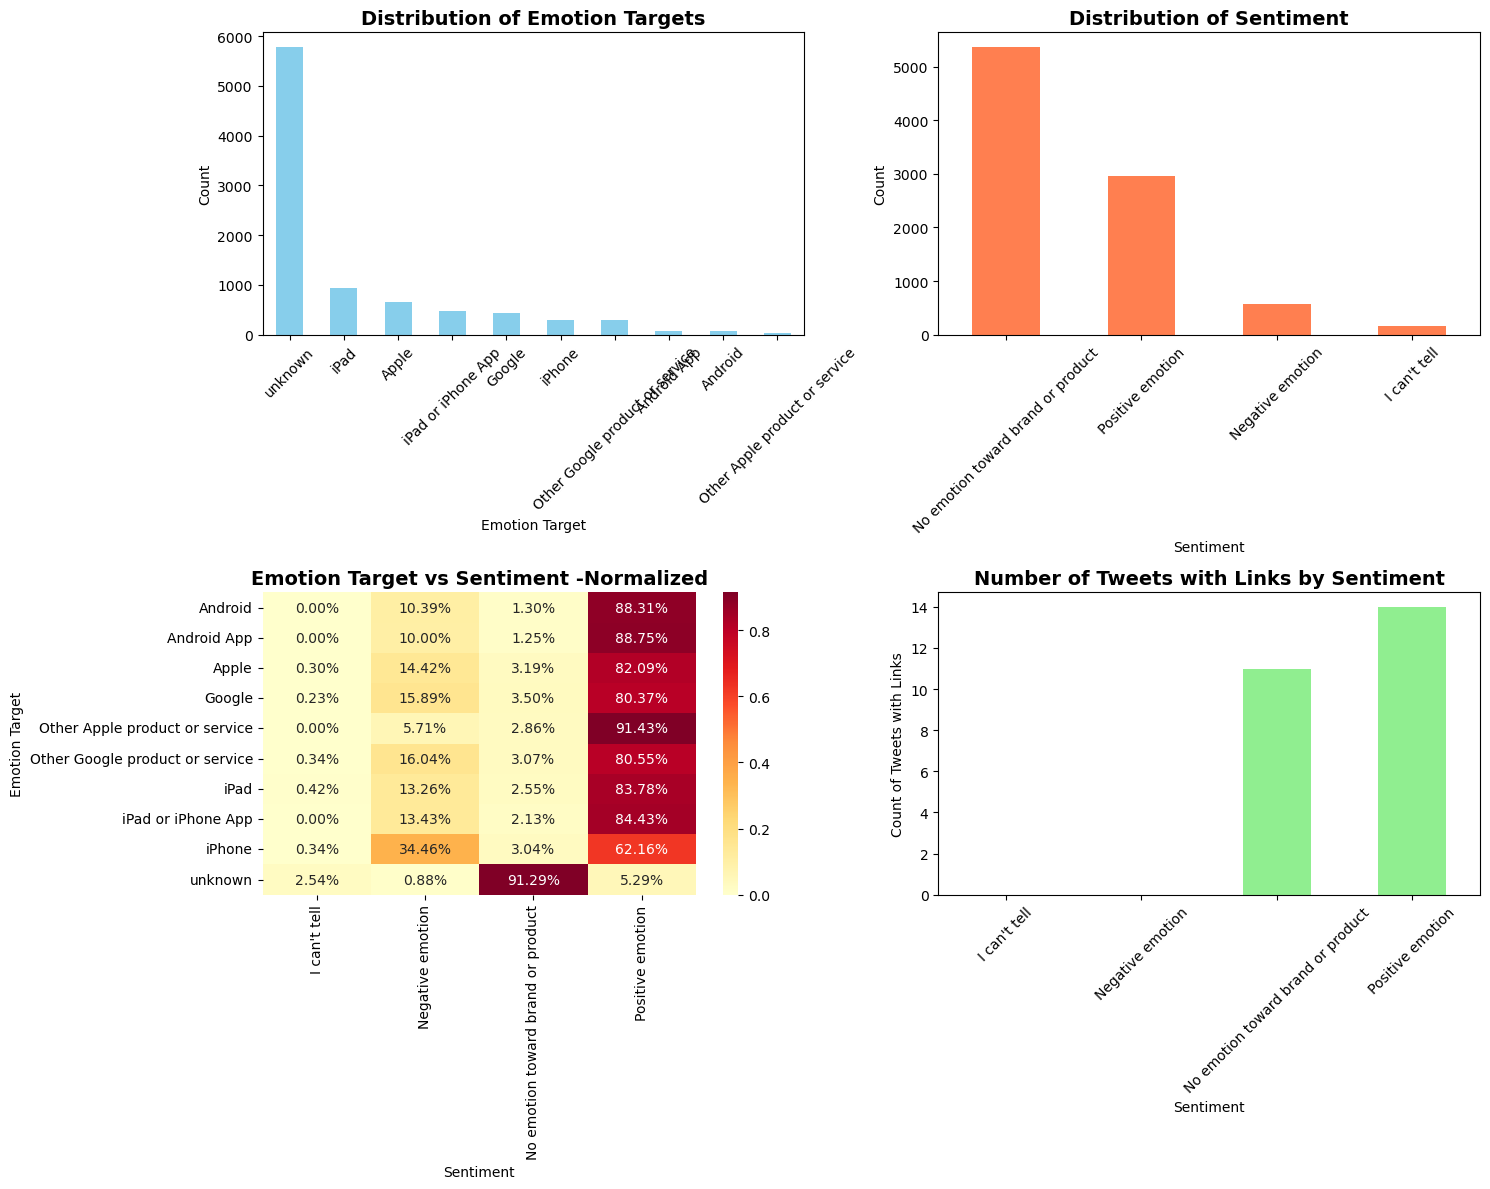

In [36]:
# Visualization
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Emotion Target Distribution
emotion_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Emotion Targets', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Emotion Target')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Sentiment Distribution
sentiment_counts = data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
sentiment_counts.plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Distribution of Sentiment', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Heatmap of Cross-tabulation
crosstab_normalized = pd.crosstab(
    data['emotion_in_tweet_is_directed_at'], 
    data['is_there_an_emotion_directed_at_a_brand_or_product'],
    normalize='index'
)
sns.heatmap(crosstab_normalized, annot=True, fmt='.2%', cmap='YlOrRd', ax=axes[1, 0])
axes[1, 0].set_title('Emotion Target vs Sentiment -Normalized', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Emotion Target')

# Plot 4: Links by Sentiment
link_by_sentiment = data.groupby('is_there_an_emotion_directed_at_a_brand_or_product')['contains_link'].sum()
link_by_sentiment.plot(kind='bar', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Number of Tweets with Links by Sentiment', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Count of Tweets with Links')
axes[1, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


### Modeling
### Baseline Model